# Introduction

This project is for Madugital as an online honey seller. The aim of this project is to find out which customers have the greatest potential to buy a Madugital product based on their activity on the website, so that Madugital could contact these customers more quickly with the right treatment. 

Madugital has a collection of Lead data obtained from forms filled in by customers who access their website. From this data, there are some customers who buy the product and some who don't, this is recorded in the 'converted' column.



# 1. Data Preparation

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# import sklearn libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Data Overview

In [2]:
# data = pd.read_csv("nama_data.csv")
%cd d:\\danalis\projj
data = pd.read_csv( "MGlead_scoring.csv")
pd.options.display.max_columns = None

d:\danalis\projj


In [3]:
# check the data shape (row , colum)
data.shape

(9240, 37)

### Variables Description:

Variables           Description

1. Prospect ID     - A unique ID with which the customer is identified.
2. Lead Number	   - A lead number assigned to each lead procured.
3. Lead Origin	   - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page     Submission, etc.
4. Lead Source	   - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
5. Do Not Email    - An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
6. Do Not Call	   - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
7. Converted	   - The target variable. Indicates whether a lead has been successfully converted or not.
8. TotalVisits	   - The total number of visits made by the customer on the website.
9. Total Time Spent on Website	- The total time spent by the customer on the website.
10. Page Views Per Visit	- Average number of pages on the website viewed during the visits.
11. Last Activity	 - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
12. Country	         - The country of the customer.
13. Specialization	 - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
14. How did you hear about Madugital	- The source from which the customer heard about Madugital.
15. What is your current occupation	    - Indicates whether the customer is a student, unemployed or employed.
16. What matters most to you in choosing this product	- An option selected by the customer indicating what is their main motto behind buying this product.
17. Search	         - Indicating whether the customer had seen the ad in any of the listed items.
18. Magazine	
19. Newspaper Article	
20. Madugital Forum	
21. Newspaper	
22. Digital Advertisement	
23. Through Recommendations	                - Indicates whether the customer came in through recommendations.24. 
24. Receive More Updates About Our Courses	- Indicates whether the customer chose to receive more updates about the courses.
25. Tags	         - Tags assigned to customers indicating the current status of the lead.
26. Lead Quality	 - Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
27. Update me on Supply Chain Content	- Indicates whether the customer wants updates on the Supply Chain Content.
28. Get updates on DM Content	        - Indicates whether the customer wants updates on the DM Content.
29. Lead Profile	                    - A lead level assigned to each customer based on their profile.
30. City	          - The city of the customer.
31. Asymmetrique Activity Index	       - An index and score assigned to each customer based on their activity and their profile
32. Asymmetrique Profile Index	
33. Asymmetrique Activity Score	
34. Asymmetrique Profile Score	
35. I agree to pay the amount through cheque	- Indicates whether the customer has agreed to pay the amount through cheque or not.
36. a free copy of Mastering The Healthy Live	- Indicates whether the customer wants a free copy of 'Mastering the Healthy Live' or not.
37. Last Notable Activity	                    - The last notable acitivity performed by the customer.


In [4]:
# data overview (random 5 data)
data.sample(5, random_state=91)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about Madugital,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,Madugital Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6936,2154ccbd-41f9-46f0-9edb-308cde9fc52d,596447,Landing Page Submission,Google,No,No,0,2.0,238,2.0,Converted to Lead,Indonesia,Travel and Tourism,Multiple Sources,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Graduation in progress,Might be,No,No,Select,Jakarta,NaN,NaN,NaN,NaN,No,No,Modified
2140,5f05a482-8fb5-4fe8-aca3-0f7b9d794178,639211,Lead Add Form,Reference,No,No,1,0.0,0,0.0,Email Link Clicked,NaN,Services Excellence,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Bodetabek,02.Medium,02.Medium,14.0,16.0,No,No,Modified
4377,2be87f90-5931-49dc-bb87-54d8452cb693,617791,Landing Page Submission,Google,No,No,0,5.0,582,5.0,SMS Sent,Indonesia,Business Administration,Online Search,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,switched off,NaN,No,No,Select,Jakarta,NaN,NaN,NaN,NaN,No,No,SMS Sent
5208,65e13a16-f5c0-49a1-8187-a4795a5941fb,609879,Landing Page Submission,Direct Traffic,No,No,0,3.0,1686,3.0,Email Opened,Indonesia,Human Resource Management,Student of SomeSchool,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Bodetabek,NaN,NaN,NaN,NaN,No,Yes,Email Opened
1041,0adb324b-c2a3-4880-a928-6e1589914ab4,649091,Landing Page Submission,Google,No,No,0,7.0,1541,3.5,Email Opened,France,Marketing Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Cities in Banten & Jawa Barat,02.Medium,01.High,14.0,17.0,No,Yes,Email Opened


In [5]:
# Display the data type of colums an empty records
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

## Data Quality Check

In [6]:
# Display unique values for all colums:

for a in data.columns:
    print('\033[1m', a, 'unique values:\033[0m', data[a].unique(), '\n')        

 Prospect ID unique values: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 

 Lead Number unique values: [660737 660728 660727 ... 579545 579538 579533] 

 Lead Origin unique values: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

 Lead Source unique values: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

 Do Not Email unique values: ['No' 'Yes'] 

 Do Not Call unique values: ['No' 'Yes'] 

 Converted unique values: [0 1] 

 TotalVisits unique values: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan  

In [7]:
# check numeric data spread
data.describe() 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# check categoric data spread
data.describe(include=['O']) # untuk data categoric

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about Madugital,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,Madugital Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Indonesia,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Jakarta,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [9]:
# checking colum empty values
data.isnull().sum() # melihat jumlah value yang kosong

Prospect ID                                          0
Lead Number                                          0
Lead Origin                                          0
Lead Source                                         36
Do Not Email                                         0
Do Not Call                                          0
Converted                                            0
TotalVisits                                        137
Total Time Spent on Website                          0
Page Views Per Visit                               137
Last Activity                                      103
Country                                           2461
Specialization                                    1438
How did you hear about Madugital                  2207
What is your current occupation                   2690
What matters most to you in choosing a product    2709
Search                                               0
Magazine                                             0
Newspaper 

In [10]:
data.isna().mean() * 100 # prosentase baris yang kosong dari keseluruhan

Prospect ID                                        0.000000
Lead Number                                        0.000000
Lead Origin                                        0.000000
Lead Source                                        0.389610
Do Not Email                                       0.000000
Do Not Call                                        0.000000
Converted                                          0.000000
TotalVisits                                        1.482684
Total Time Spent on Website                        0.000000
Page Views Per Visit                               1.482684
Last Activity                                      1.114719
Country                                           26.634199
Specialization                                    15.562771
How did you hear about Madugital                  23.885281
What is your current occupation                   29.112554
What matters most to you in choosing a product    29.318182
Search                                  

In [11]:
# check duplicated key row
data.loc[data['Prospect ID'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about Madugital,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,Madugital Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [12]:
# In the column 'Lead Source' some of the source is the same as the other
data['Lead Source']=data['Lead Source'].replace('google','Google')
data['Lead Source']=data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source']=data['Lead Source'].replace('welearnblog_Home','blog')

In [13]:
# to fix some other misspelling
data['Country']=data['Country'].replace('unknown','Unknown')
data['Specialization']=data['Specialization'].replace('Select','Unknown')
data['How did you hear about Madugital']=data['How did you hear about Madugital'].replace('Select','Unknown')
data['Lead Profile']=data['Lead Profile'].replace('Select','Unknown')

In [14]:
# Drop unnecessary features that we don't really need
data.drop(['Prospect ID','Lead Number','Last Activity','Magazine','Receive More Updates About Our Products',
              'Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview'],inplace=True,axis=1) 

## Handling Missing Values

In [15]:
# Fill the missing value of the categorical features with 'Modus' of the colum.

categorical = ['Lead Source','Country','What is your current occupation','What matters most to you in choosing a product','Tags','Lead Quality','Asymmetrique Activity Index',
               'Asymmetrique Profile Index','Specialization','How did you hear about Madugital','Lead Profile']

for col in categorical:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())


In [16]:
# Fill the missing value of the numerical features with their means.

numerical = ['TotalVisits','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']

for col in numerical:
    data[col]=data[col].fillna(data[col].mean())

In [17]:
# check empty data
data.isnull().sum()

Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Country                                           0
Specialization                                    0
How did you hear about Madugital                  0
What is your current occupation                   0
What matters most to you in choosing a product    0
Search                                            0
Newspaper Article                                 0
Madugital Telegram                                0
Newspaper                                         0
Digital Advertisement                             0
Through Recommendations                           0
Tags        

In [18]:
# data_dropped.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Lead Origin                                     9240 non-null   object 
 1   Lead Source                                     9240 non-null   object 
 2   Do Not Email                                    9240 non-null   object 
 3   Do Not Call                                     9240 non-null   object 
 4   Converted                                       9240 non-null   int64  
 5   TotalVisits                                     9240 non-null   float64
 6   Total Time Spent on Website                     9240 non-null   int64  
 7   Page Views Per Visit                            9240 non-null   float64
 8   Country                                         9240 non-null   object 
 9   Specialization                           

# 2. Finding Data Insight

<Axes: >

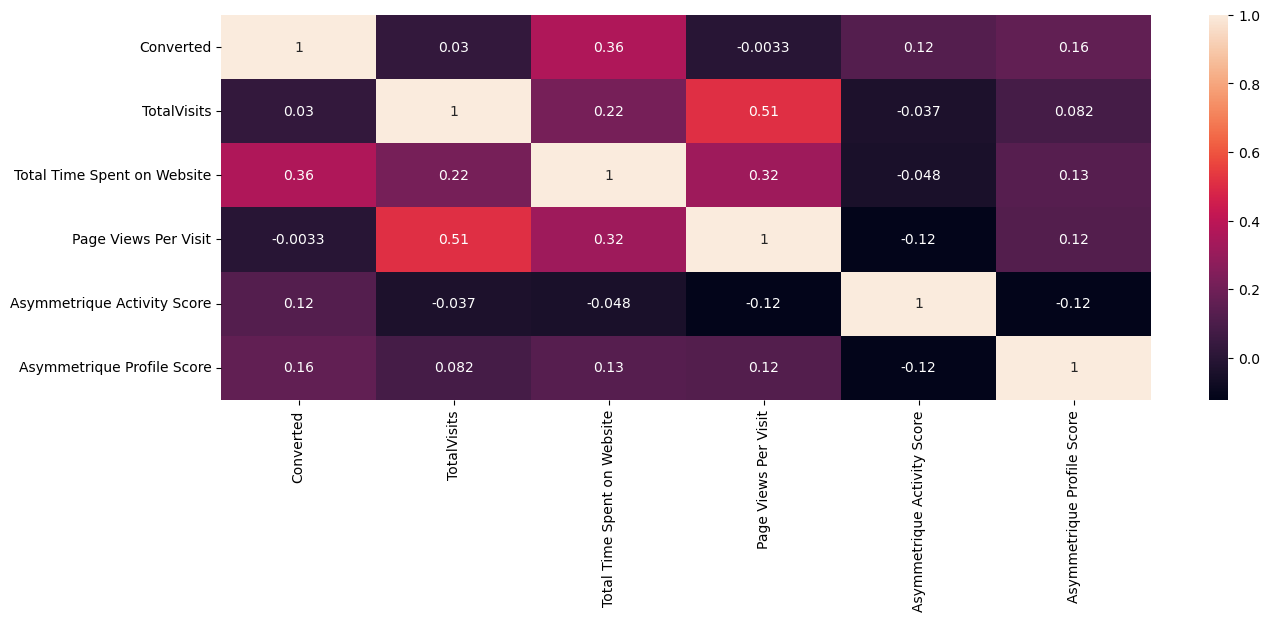

In [19]:
# Calculating the correlation the numerical features.

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(numeric_only=True), ax=ax, annot=True)



In [20]:
# Create a pie chart of the converted percentage.

data['Converted'].value_counts(dropna = False)

Converted
0    5679
1    3561
Name: count, dtype: int64

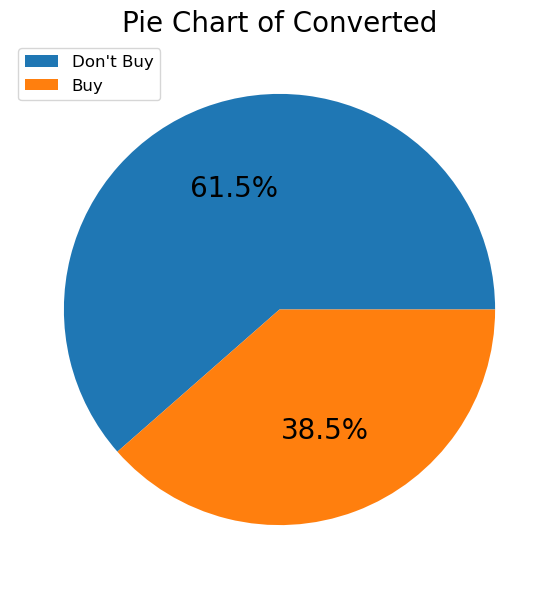

In [21]:
plt.figure(figsize=(10, 7))
label=["Don't Buy","Buy"]
plt.pie(data['Converted'].value_counts(dropna = False), autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Pie Chart of Converted',fontsize="20")
plt.legend(label, loc ="upper left", fontsize="12")
plt.show() 

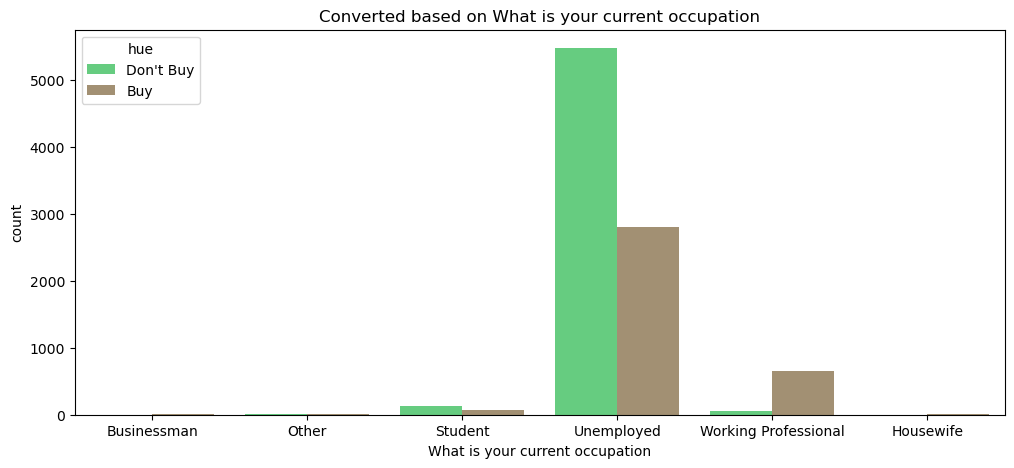

In [22]:
# Create a 'converted' bar graph based on the categorical features.

col='What is your current occupation'
data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)
df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on What is your current occupation")
plt.show()

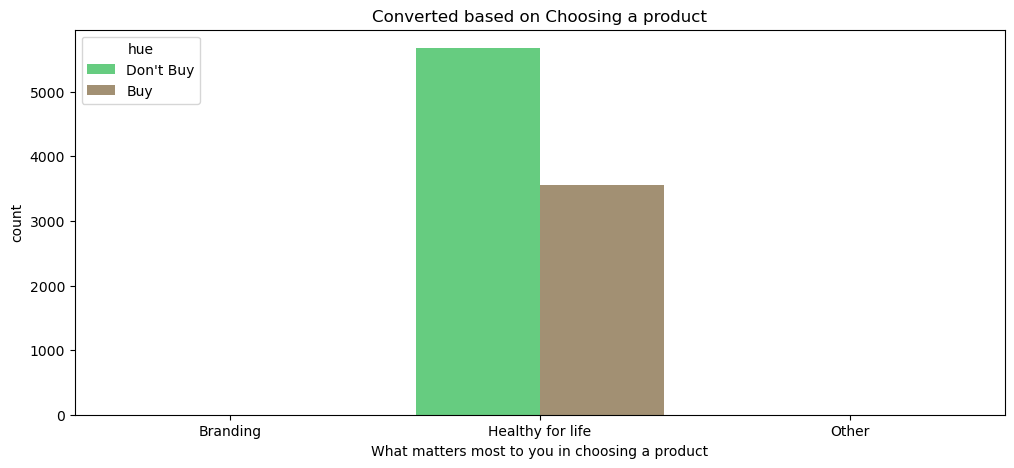

In [24]:
col='What matters most to you in choosing a product'
data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on Choosing a product")
plt.show()

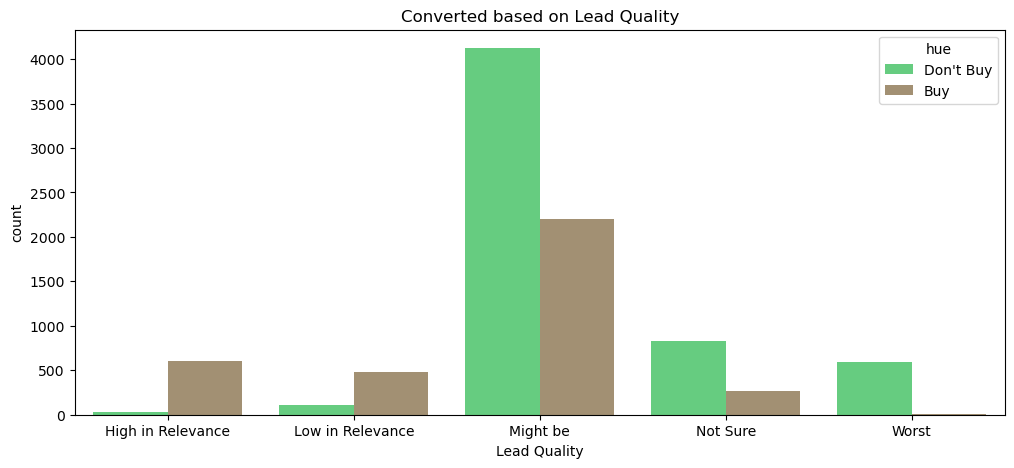

In [25]:
col='Lead Quality'

data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on Lead Quality")
plt.show()

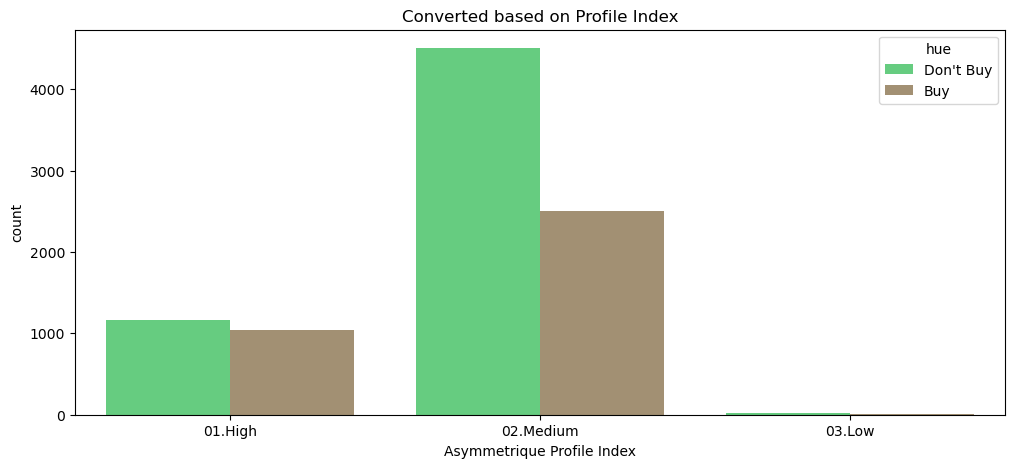

In [26]:
col='Asymmetrique Profile Index'

data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")   #viridis
plt.title("Converted based on Profile Index")
plt.show()

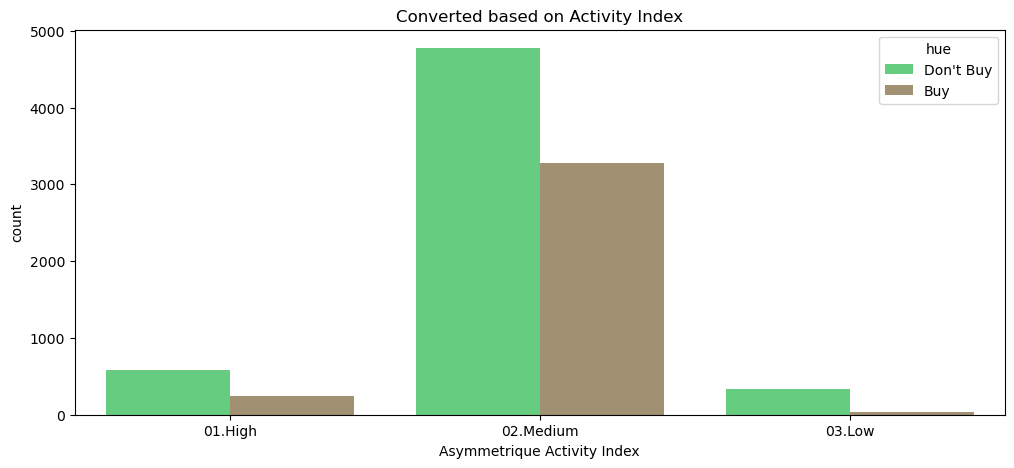

In [27]:
col='Asymmetrique Activity Index'

data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on Activity Index")
plt.show()

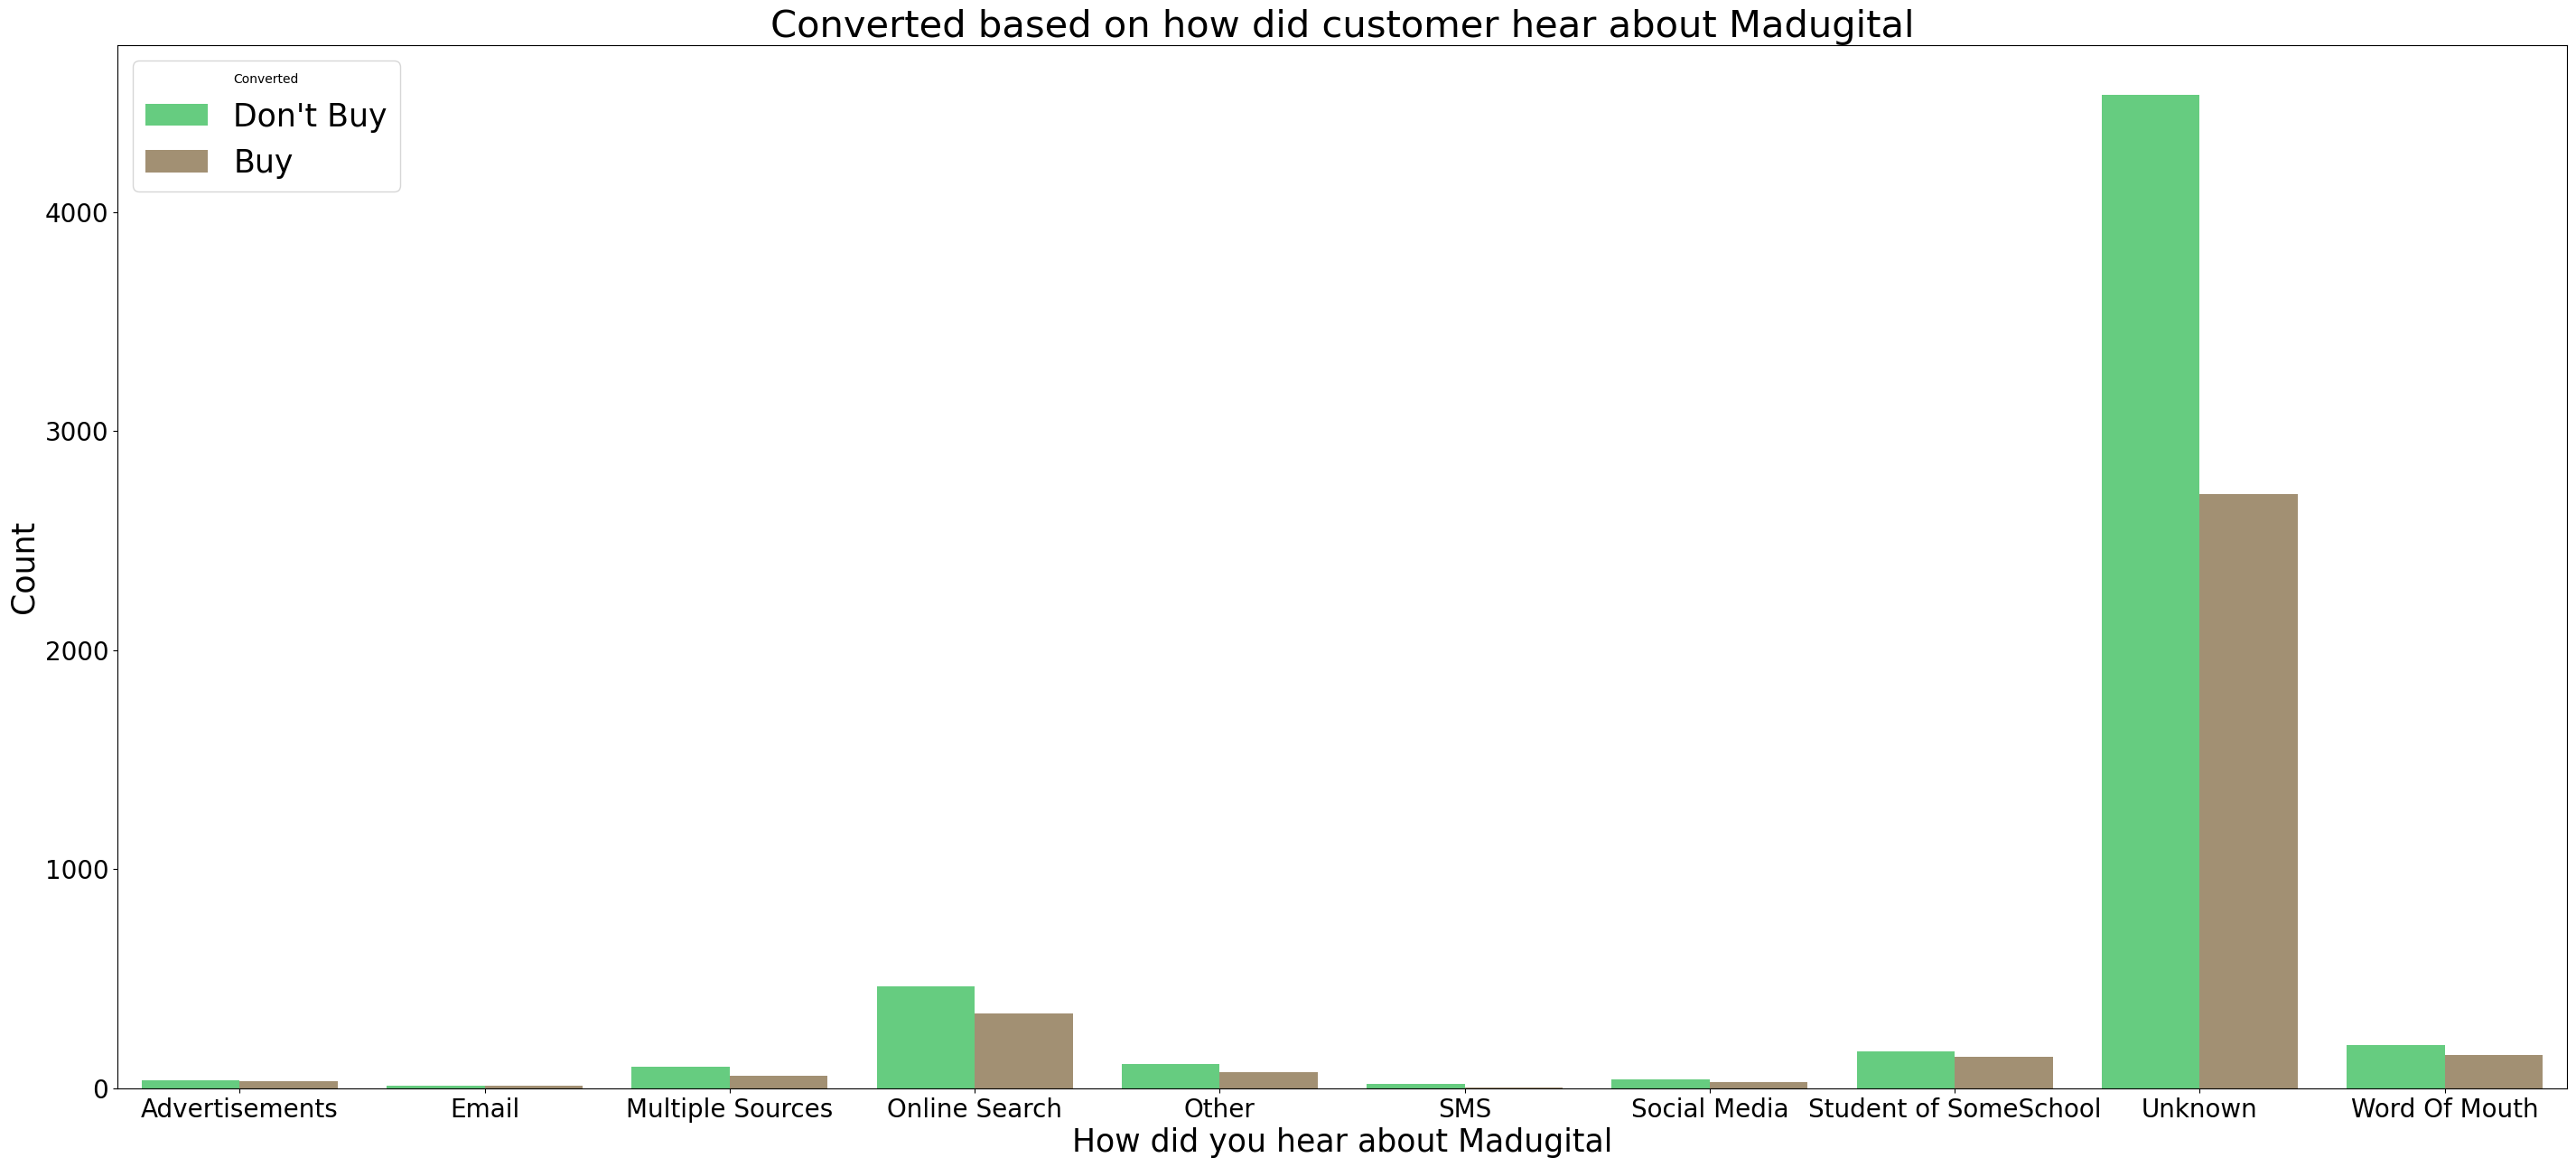

In [28]:
col='How did you hear about Madugital'

data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)


df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(35, 15))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on how did customer hear about Madugital", fontsize=30)
plt.legend(title='Converted', fontsize='25',loc ="upper left")
plt.ylabel('Count', fontsize=25)
plt.xlabel(col, fontsize=25)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show()

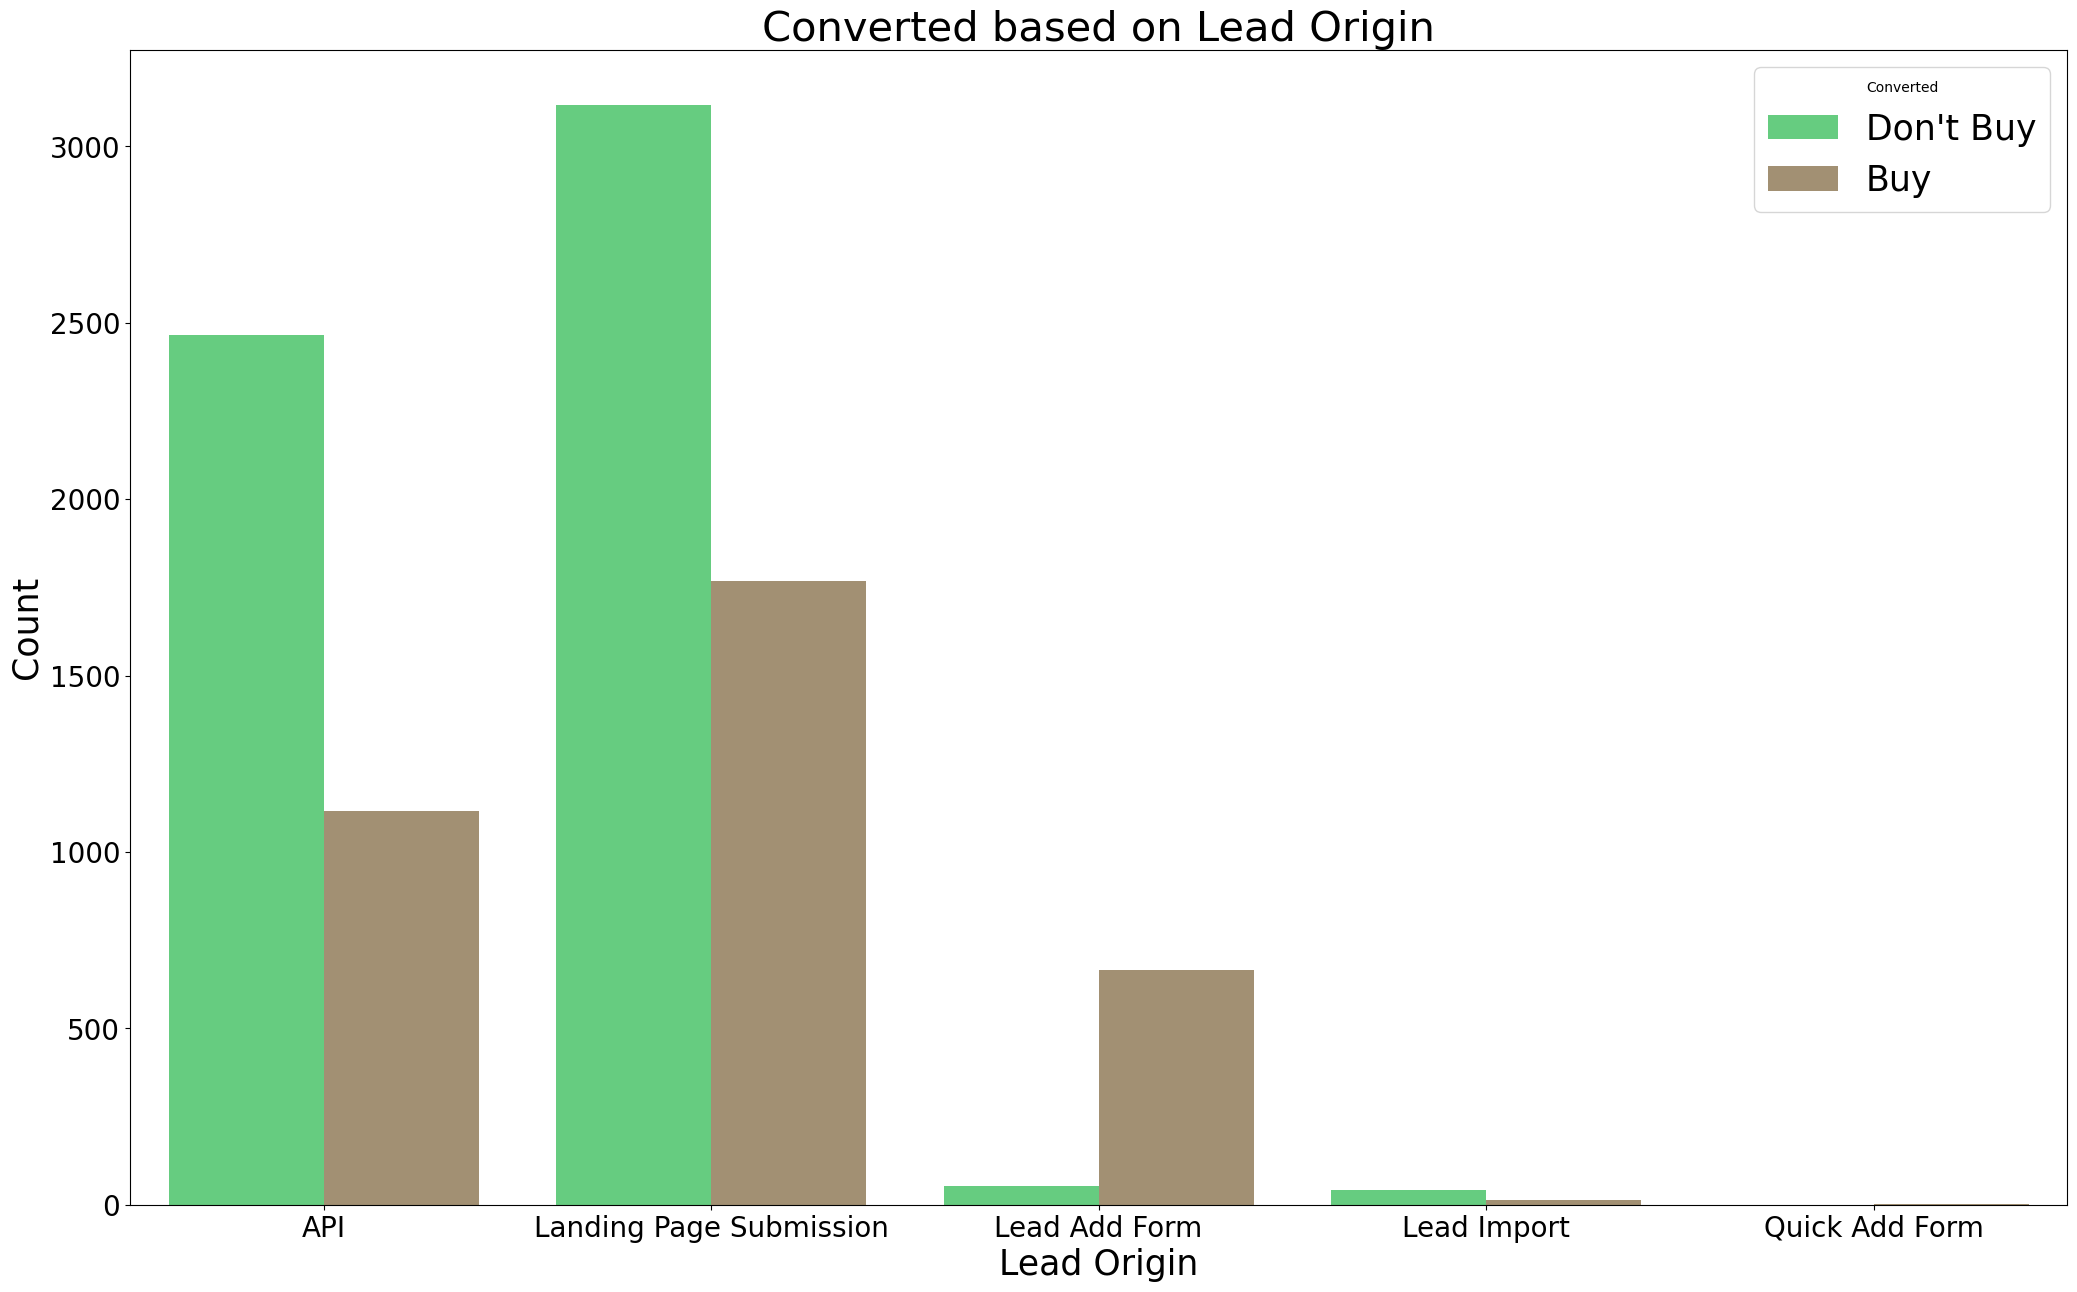

In [29]:
col='Lead Origin'

data1 = data[data["Converted"] == 0]
data2 = data[data["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(25, 15))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="terrain")
plt.title("Converted based on Lead Origin", fontsize=30)
plt.legend(title='Converted', fontsize='25',loc ="upper right")
plt.ylabel('Count', fontsize=25)
plt.xlabel(col, fontsize=25)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show()

# 3. Data Manipulation

In [30]:
## Create dummies from the categorical features.

dummies=pd.get_dummies(data[['Lead Source','Lead Origin','Country','Do Not Email', 'Do Not Call','Specialization',
                                'How did you hear about Madugital','Tags','What matters most to you in choosing a product','What is your current occupation','Search',
                                'Newspaper Article', 'Madugital Telegram', 'Newspaper','Digital Advertisement',
                                'Through Recommendations','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Profile',
                                'Last Notable Activity',]],drop_first=True,dtype=int)  ##drop_first=True
dummies.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about Madugital_Email,How did you hear about Madugital_Multiple Sources,How did you hear about Madugital_Online Search,How did you hear about Madugital_Other,How did you hear about Madugital_SMS,How did you hear about Madugital_Social Media,How did you hear about Madugital_Student of SomeSchool,How did you hear about Madugital_Unknown,How did you hear about Madugital_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What matters most to you in choosing a product_Healthy for life,What matters most to you in choosing a product_Other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Madugital Telegram_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a P

# 4. Modeling Preparation

In [31]:
## Join the dummies with the final data and drop the unnecessary variables from the final data

final_data=data.join(dummies)

In [32]:
final_data.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call','Country', 'Specialization', 
                 'How did you hear about Madugital','What is your current occupation','What matters most to you in choosing a product', 'Search','Newspaper Article', 
                 'Madugital Telegram', 'Newspaper','Digital Advertisement','Through Recommendations','Tags', 'Lead Quality',
                 'Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], axis = 1, inplace = True)

In [33]:
final_data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=159)

In [34]:
## Define the x and y of the model and split the data using train_test_split.

x = final_data.drop(['Converted'],axis=1)
y = final_data['Converted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6468, 158), (6468,), (2772, 158), (2772,))

# 5. Modeling

In [35]:
## Start modelling the data.

## Decision Tree Classifier

dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)

print("confusion matrics=",cm_dt)
print(classification_report(y_test,y_pred_dt))

confusion matrics= [[1548  129]
 [ 161  934]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1677
           1       0.88      0.85      0.87      1095

    accuracy                           0.90      2772
   macro avg       0.89      0.89      0.89      2772
weighted avg       0.90      0.90      0.90      2772



In [36]:
## Random Forest Classifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)

print("confusion matrics=",cm_rf)
print(classification_report(y_test,y_pred_rf))

confusion matrics= [[1595   82]
 [ 129  966]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1677
           1       0.92      0.88      0.90      1095

    accuracy                           0.92      2772
   macro avg       0.92      0.92      0.92      2772
weighted avg       0.92      0.92      0.92      2772



# 6. Modelling Evaluation

In [37]:
## Here is the prediction result from the Random Forest Classifier

result = pd.DataFrame(y_test).join(pd.DataFrame(y_pred_rf).set_index(y_test.index))
result

,Converted,0
2140,1,1
7707,1,1
1522,1,1
1873,0,0
8100,1,1
...,...,...
2491,0,0
4850,1,0
7829,1,1
2999,0,0
